# <center>CITS5508 Lab sheet 2: Classification on DryBean</center>
**Name: Wei Yang**<br>
**Student number: 21220208**<br>
**Date created:  12th March 2021**<br>
**Last modified: 19th March 2021**<br>

## 1. Introduction
This lab uses Support Vector Classifier and Stochastic Gradient Descent Classifier to classify 7 classes of Dry Bean and compare the results.


## 2.Data loading and visualization
### 2.1 Loading data

In [14]:
#loading data from given xlsm file which is under the same forder as the notebook
from openpyxl import load_workbook
import numpy as np
import pandas as pd
import os
# To get the filepath of xlsx file
filePath = os.path.join('DryBeanDataset','Dry_Bean_Dataset.xlsx')
# To load file and get the right information into a dataframe
wb = load_workbook(filePath)
ws = wb['Dry_Beans_Dataset']
data = ws.values
columnNames = next(data)
df = pd.DataFrame(data, columns=columnNames)
# df = pd.read_excel(filePath)

### 2.2 Inspect data

In [15]:
#To display the first few lines in order to inspect the columns
print('\033[1;30m' + 'The first few lines of the data ' + '\033[0m')
df.head(3)

The first few lines of the data 


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [16]:
#To display datatpye of each column
print('\033[1;30m' + 'Datatype for columns ' + '\033[0m')
df.info()

Datatype for columns 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  obj

In [17]:
#To display the atttributes of numerical features
print('\033[1;30m' + 'Atttributes of numerical features' + '\033[0m')
df.describe()

Atttributes of numerical features


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### 2.3 Visualise features

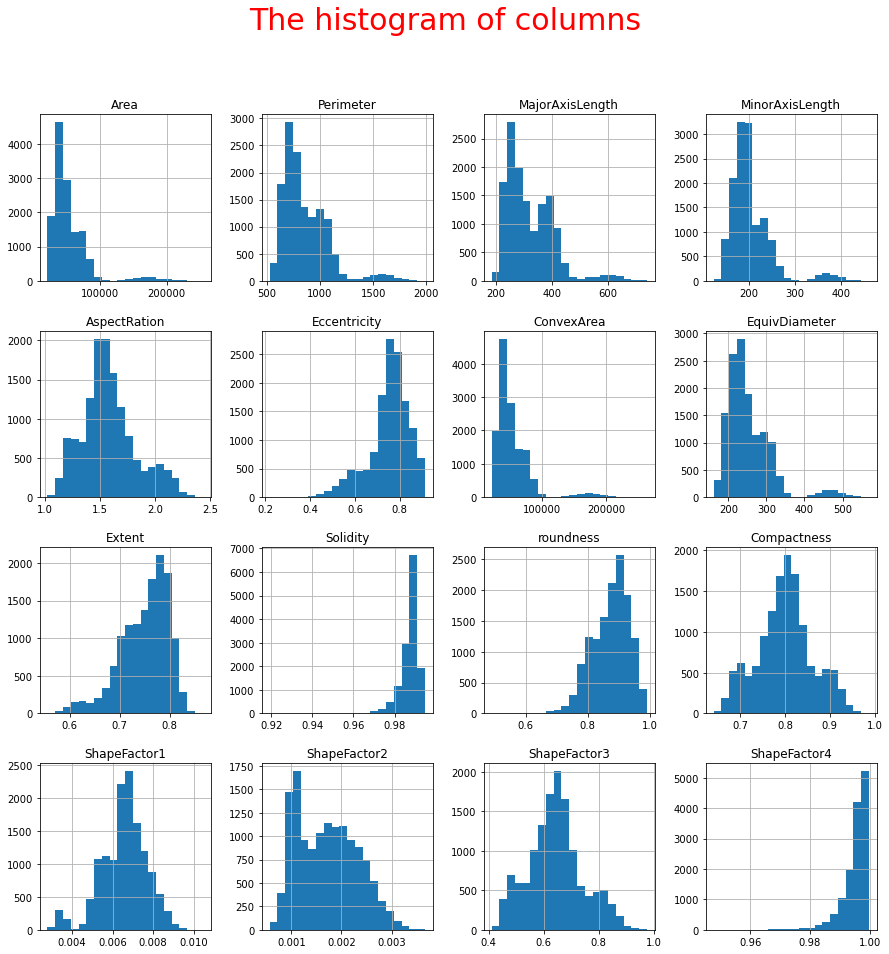

In [18]:
#plot the histogram of each column so as to display different features
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(15,15))
plt.suptitle("The histogram of columns",fontsize=30, color = 'red')
plt.show()

### 2.4 Relations between selected features

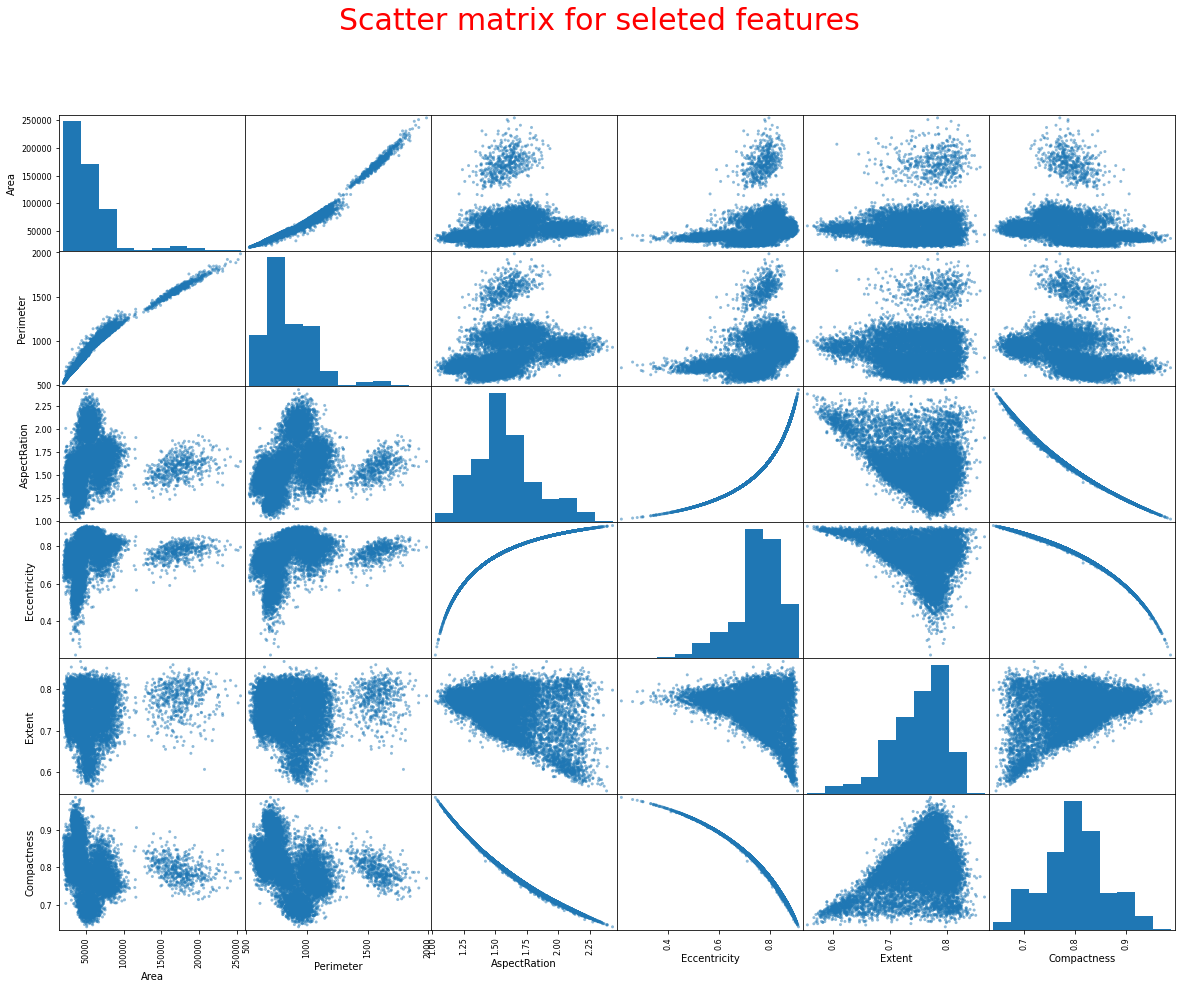

In [19]:
#ploting scatter_matrix for 6 selected features 
from pandas.plotting import scatter_matrix
features = ["Area", "Perimeter", "AspectRation","Eccentricity","Extent","Compactness"]
scatter_plots = scatter_matrix(df[features], figsize=(20,15))
plt.suptitle("Scatter matrix for seleted features",fontsize=30, color = 'red')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
data = df[["Area","AspectRation"]]


In [36]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data, 0.2)
len(train_set)

10889

In [37]:
X_train = train_set.drop(columns=["Area"])
X_val = test_set.drop(columns=["Area"])
y_train = train_set["Area"]
y_val = test_set["Area"]

Best epoch = 131
Mean squared error of the best model is 769099414.739096


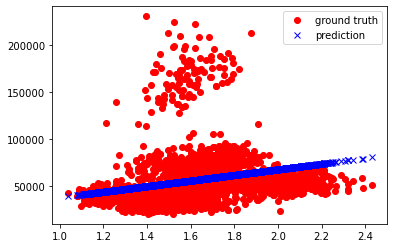

In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
sgd = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate='constant', eta0=0.005)
min_val_err = np.float("inf")
best_epoch = None
best_sgd = None
for epoch in range(500):
    sgd.fit(X_train, y_train)
    y_pred = sgd.predict(X_val)
    err = mean_squared_error(y_val, y_pred)
    if err < min_val_err:
        min_val_err = err
        best_epoch = epoch
        best_sgd = sgd
print('Best epoch =', best_epoch)
y_pred = best_sgd.predict(X_val)
print('Mean squared error of the best model is',mean_squared_error(y_val, y_pred))
plt.plot(X_val, y_val, 'ro', X_val, y_pred, 'bx')
plt.legend(['ground truth', 'prediction'])
plt.show()


### 2.5 Scatter Matrix Analysis
**According to the scatter plots above, a few observations are listed below:**
1. Area and Perimeter features are closely related. This relationship appears to be positive liner.
2. Similarly, AspectRation,Eccentricity and Compactness are closely related. 
   - AspectRation and Eccentricity are nearly positive liner realted or polynomial related.
   - AspectRation and Compactness are nealy negative liner related.
   - Eccentricity and Compactness are nealy negative liner related.
3. There appears to be clusters between other features but they are not obviously related.

### 2.6 Number of instance of each class
We can easily find that Bombay has the fewest instances

In [7]:
#Display the number of instances for each class
df["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

## 3.Data preparation and feature scaling
### 3.1 Data cleaning and missing data analysis

In [8]:
#To display the number of missing values
#As there is no missing value in the data we do not need to deal with missing value.
df.isnull().sum(axis=0)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### 3.2 Data splitting

In [25]:
#To divide the dataset into training and testing set with the propotion of 80% and 20% separately 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Class"]), df["Class"], test_size=0.2)
# print the number of instances in training and testing set
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))

Train set size: 10888
Test set size: 2723


### 3.3 Feature scaling 

In [10]:
#Using Minmax Scaler to do scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Perform an appropriate feature scaling on training set and testing set with the same transformation parameters 
X_train_scaled = scaler.fit_transform(X_train) #fit the Scaler with training set to find parameters then make a transformation on train set
X_test_scaled = scaler.transform(X_test) #apply the same transformation on testing set

## 4. Support Vector Classifier

### 4.1 Model building and training

In [11]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix,classification_report
# oneversus-one binary classification for Support Vector Classifier so as to deal with multiclass classification
svm_clf = OneVsOneClassifier(SVC(kernel="rbf", C=110)) #Select C as the hyperparament I adjust to get a good result
svm_clf.fit(X_train_scaled, y_train) # Train the model


OneVsOneClassifier(estimator=SVC(C=110))

### 4.2 Hyperparameter selection
- The kernel of SVC are selected between linear and rbf.
The score of rbf tend to be better than that of linear. So rbf is my finaly option.

- I choose hyperparameter C to adjust it so as to get the best score. A small C value leads to more margin violations and a big C leads to less margin violations.
1. Set C = 1 as default calculate the score.
2. Set C to be a large number such as 100 to see if how the score change.
3. Then continue adjust C according to the change of score and finally I set it to be 110 and the score tend to be closed to the best.

In [12]:
#perform cross validation to calculate the average accuracy. It can be use to select proper hyperparameters
score =np.round(np.mean(cross_val_score(OneVsOneClassifier(SVC(kernel="rbf", C=110)), X_train_scaled, y_train, cv=10)),4) 
score1 =np.round(np.mean(cross_val_score(OneVsOneClassifier(SVC(kernel="linear", C=110)), X_train_scaled, y_train, cv=10)),4)
print('VSC&rbf: %f' %score)
print('VSC&linear: %f' %score1)

VSC&rbf: 0.929000
VSC&linear: 0.924900


### 4.3 Confusion matrix on the testing set

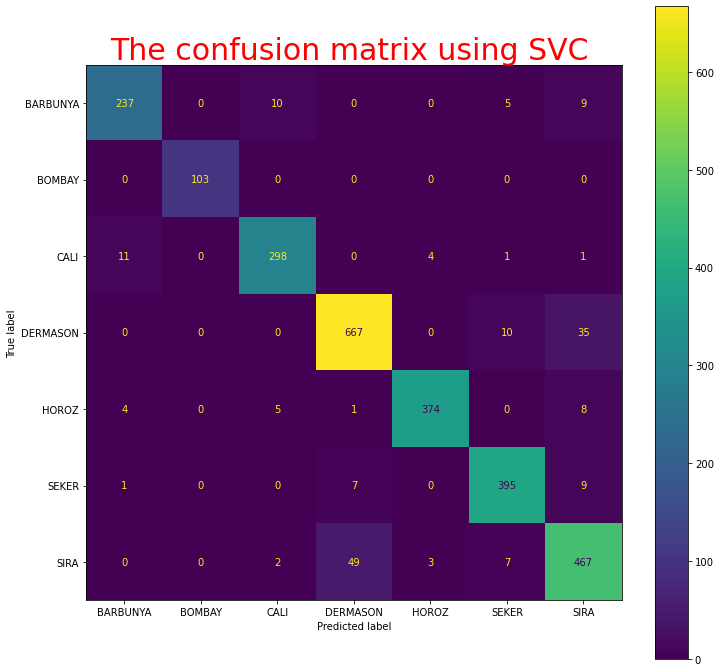

In [13]:
# Confusion matrix illustration 
fig, ax = plt.subplots(figsize=(12, 12)) #set the size of the figure
plot_confusion_matrix(svm_clf,X_test_scaled,y_test, ax=ax)
plt.title("The confusion matrix using SVC ",fontsize=30, color = 'red')
plt.show()

## 5. Stochastic Gradient Descent classifier
### 5.1 Model building and training

In [14]:
# oneversus-one binary classification for SGDClassifier so as to deal with multiclass classification
from sklearn.linear_model import SGDClassifier
sgd_clf = OneVsOneClassifier(SGDClassifier(penalty='l1',alpha=0.0001)) 
sgd_clf.fit(X_train_scaled, y_train) # Train the model

OneVsOneClassifier(estimator=SGDClassifier(penalty='l1'))

### 5.2 Hyperparameter selection
In this part, I will look at 2 different ways to constrain the weights.
- l2 (penalty base on square parameters） 
- l1 (penalty based on absolute value of parameters）
- Alpha is the weight of the penalty, it is set to be 0.0001 as default.
**penalty l1 tend to get a better score with cross validation and the average scores are shown below**

In [15]:
#perform cross validation to calculate the average accuracy. It can be use to select proper hyperparameters
score =np.round(np.mean(cross_val_score(OneVsOneClassifier(SGDClassifier(penalty='l2',alpha=0.0001)), X_train_scaled, y_train, cv=10)),4)
score1 =np.round(np.mean(cross_val_score(OneVsOneClassifier(SGDClassifier(penalty='l1',alpha=0.0001)), X_train_scaled, y_train, cv=10)),4)
print('SGD&l2: %f' %score)
print('VSC&l1: %f' %score1)

SGD&l2: 0.908500
VSC&l1: 0.918800


### 5.3 Confusion matrix on the testing set

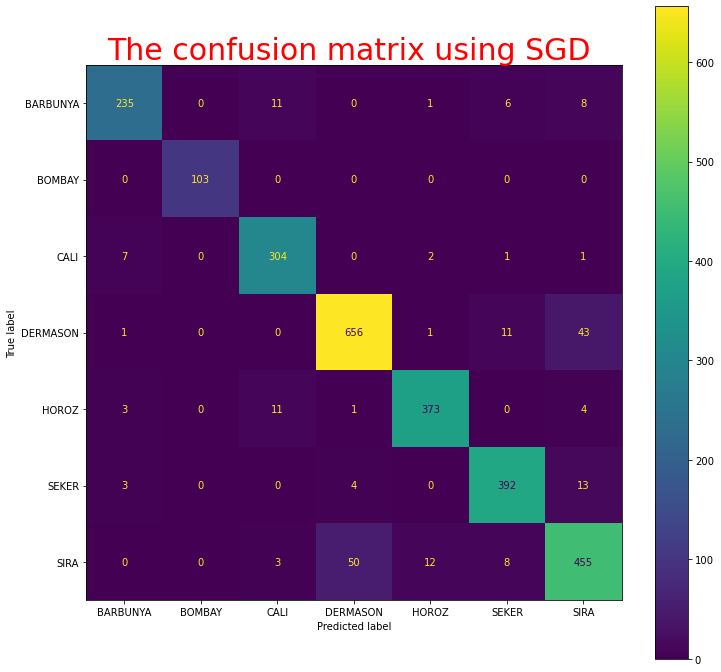

In [16]:
# Confusion matrix illustration 
fig, ax = plt.subplots(figsize=(12, 12)) #set the size of the figure
plot_confusion_matrix(sgd_clf,X_test_scaled,y_test, ax=ax)
plt.title("The confusion matrix using SGD ",fontsize=30, color = 'red')
plt.show()

## 6. Comparison and Conclusion

In [17]:
#print the performance report of two classifiers
print('\033[1;31m' + 'Performanace of Support Vector Classifier ' + '\033[0m')
print(classification_report(y_test, svm_clf.predict(X_test_scaled), digits=3))
print("------------------------------------------------------------------")
print('\033[1;31m' + 'Performanace of Stochastic Gradient Descent classifier ' + '\033[0m')
print(classification_report(y_test, sgd_clf.predict(X_test_scaled), digits=3))

Performanace of Support Vector Classifier 
              precision    recall  f1-score   support

    BARBUNYA      0.937     0.908     0.922       261
      BOMBAY      1.000     1.000     1.000       103
        CALI      0.946     0.946     0.946       315
    DERMASON      0.921     0.937     0.929       712
       HOROZ      0.982     0.954     0.968       392
       SEKER      0.945     0.959     0.952       412
        SIRA      0.883     0.884     0.884       528

    accuracy                          0.933      2723
   macro avg      0.945     0.941     0.943      2723
weighted avg      0.933     0.933     0.933      2723

------------------------------------------------------------------
Performanace of Stochastic Gradient Descent classifier 
              precision    recall  f1-score   support

    BARBUNYA      0.944     0.900     0.922       261
      BOMBAY      1.000     1.000     1.000       103
        CALI      0.924     0.965     0.944       315
    DERMASON      0.

**The conclusion of comparing the confusion matrixs of the two of models are list below:**

- Within a confusion matrix, the rows represent the ture class, and columns represent predicted class. 
- The diagonal represents the ture positive prediction for each class. 
- Accray of prediction equals to the sum of diagonal divided by the total number of instance. 
- Precise of each class equals to the unit on the diagonal divided by the sum of its column.
- Recall of each class  equals to the unit on the diagonal divided by the sum of its row.
- According to  the matrix and performance report, the Support Vector Classifier tend to have a better accuracy as well as better average precision and recall for nearly each classes.
- Only the recall for HOROZ of SVC may be less than that of SGD classifer.
- According to the matrix, DERMASON and SIRA are two classes which are easily to confuse.
- BOMBAY is the easiest type to distinguish by the given features with 100% precision and recall. However it may partly because it has significant less instances in the test set.


**Overall, the Support Vector Classifier classfier performs better than Stochastic Gradient Descent classifier in this lab.**